In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [70]:
data = "/Users/sindhujach/Desktop/ECE_699/Traffic_simulation/Weeklytask-5thnov/fcd_output2.xlsx"
df = pd.read_excel(data)

In [71]:
df

,id,x,y,angle,type,speed,pos,lane,slope,time
0,flow_aggressive_E.0,94.90,101.60,270.0,aggressive,11.54,5.10,-E31_1,0.0,0.0
1,flow_aggressive_N.0,-101.60,294.90,180.0,aggressive,14.31,5.10,-E30_1,0.0,0.0
2,flow_aggressive_W.0,-294.90,98.40,90.0,aggressive,14.53,5.10,-E29_1,0.0,0.0
3,flow_default_E.0,94.90,104.80,270.0,default,13.03,5.10,-E31_0,0.0,0.0
4,flow_default_N.0,-104.80,294.90,180.0,default,14.72,5.10,-E30_0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
63926,flow_tailgater_N.49,57.36,95.20,90.0,tailgater,12.96,46.52,E31_0,0.0,2161.0
63927,flow_inexperienced_S.49,-95.20,294.25,0.0,inexperienced,10.46,83.40,E30_0,0.0,2162.0
63928,flow_tailgater_E.49,-104.80,-94.90,180.0,tailgater,16.09,85.38,E32_0,0.0,2162.0
63929,flow_tailgater_N.49,71.82,95.20,90.0,tailgater,14.46,60.98,E31_0,0.0,2162.0


Exploratory data Analysis

In [61]:
df.describe(include='all')

,id,x,y,angle,type,speed,pos,lane,slope,time
count,63931,63931.000000,63931.000000,63931.000000,63931,63931.000000,63931.000000,63931,63931.0,63931.000000
unique,1000,NaN,NaN,NaN,7,NaN,NaN,40,NaN,NaN
top,flow_default_N.31,NaN,NaN,NaN,default,NaN,NaN,E26_0,NaN,NaN
freq,134,NaN,NaN,NaN,13603,NaN,NaN,9669,NaN,NaN
mean,NaN,-100.458896,105.047601,168.804692,NaN,7.831964,71.531034,NaN,0.0,1067.289906
std,NaN,85.027635,84.405908,102.796653,NaN,4.216688,48.675160,NaN,0.0,615.311327
min,NaN,-299.790000,-99.850000,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.000000
25%,NaN,-178.950000,32.340000,90.000000,NaN,4.880000,23.410000,NaN,0.0,534.000000
50%,NaN,-101.600000,104.800000,180.000000,NaN,7.900000,71.320000,NaN,0.0,1067.000000
75%,NaN,-24.880000,188.660000,269.510000,NaN,11.410000,118.040000,NaN,0.0,1600.000000


In [62]:
df.isnull().sum()

id       0
x        0
y        0
angle    0
type     0
speed    0
pos      0
lane     0
slope    0
time     0
dtype: int64

In [26]:
df['type'].value_counts()

type
default          13603
inexperienced    10918
distracted       10101
speeder           9055
aggressive        8951
tailgater         7076
passive           4227
Name: count, dtype: int64

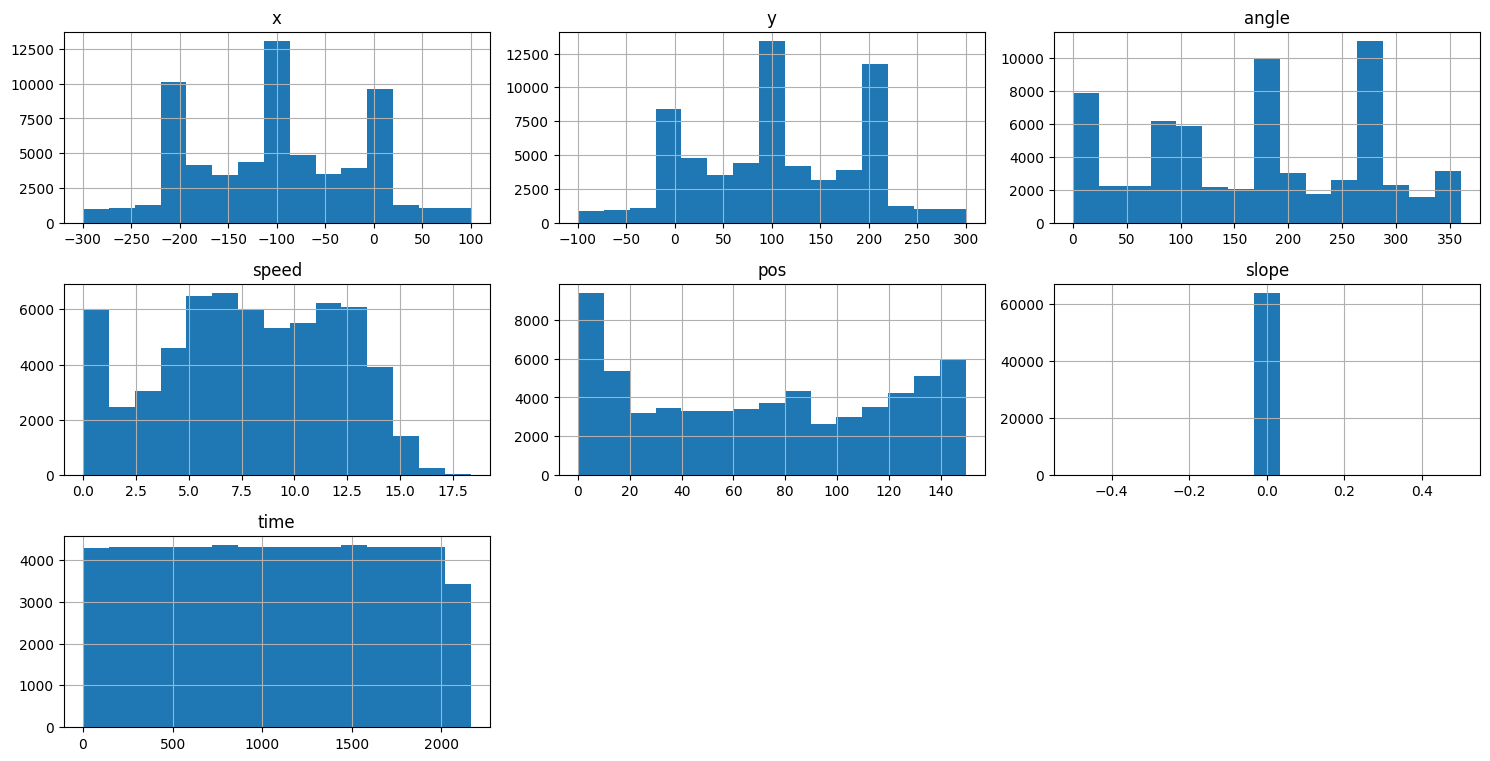

In [63]:
# Plotting histograms for numerical data
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

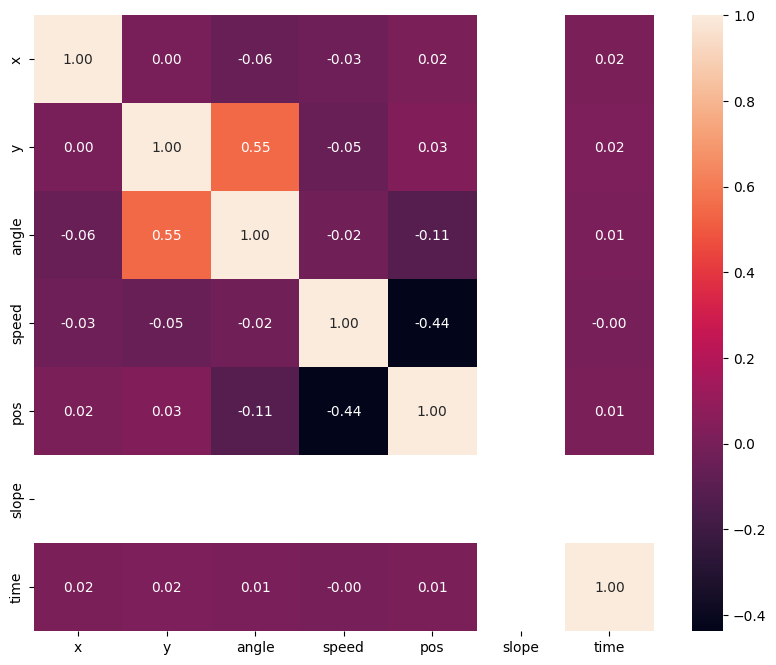

In [64]:
# Correlation heatmap
df1 = df.drop('id', axis = 1)
df1 = df1.drop('type', axis = 1)
df1 = df1.drop('lane', axis = 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.show()


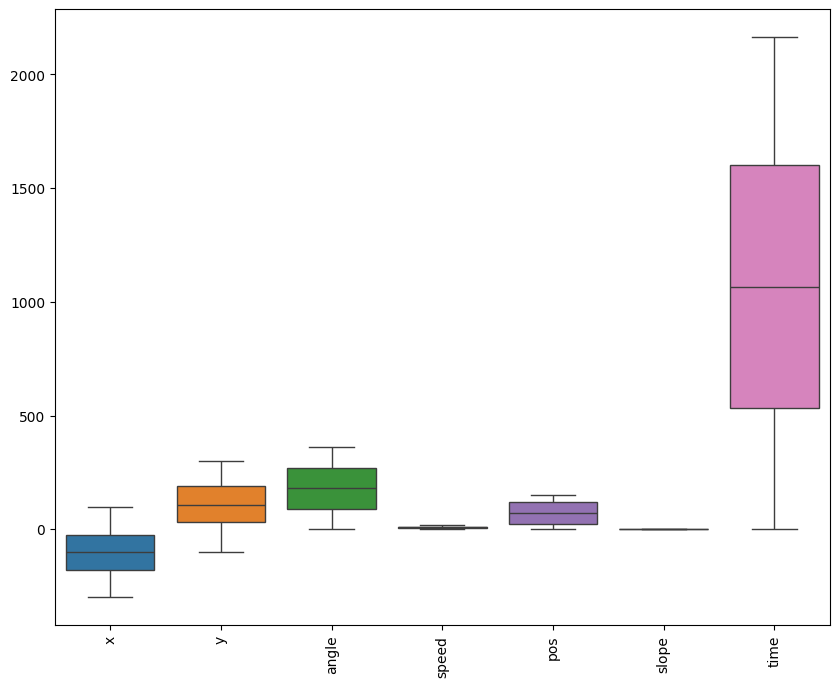

In [65]:
# Boxplot to check for outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()


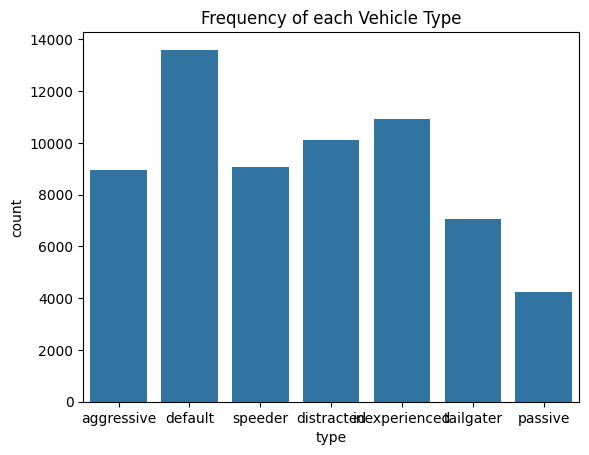

In [66]:
sns.countplot(x='type', data=df)
plt.title('Frequency of each Vehicle Type')
plt.show()

In [72]:
scaler = StandardScaler()
df = df.drop('id', axis = 1)
df = df.drop('lane', axis = 1)
df = df.drop('type', axis = 1)
data_scaled = scaler.fit_transform(df.drop('type', axis=1)) 
data_scaled = pd.DataFrame(data_scaled, columns=df.columns[:-1])  # Without the target column

In [73]:
data_scaled

,x,y,angle,type,speed,pos,slope
0,2.297611,-0.040846,0.984430,0.879379,-1.364794,0.0,-1.734566
1,-0.013420,2.249296,0.108908,1.536298,-1.364794,0.0,-1.734566
2,-2.286817,-0.078758,-0.766614,1.588472,-1.364794,0.0,-1.734566
3,2.297611,-0.002933,0.984430,1.232739,-1.364794,0.0,-1.734566
4,-0.051056,2.249296,0.108908,1.633531,-1.364794,0.0,-1.734566
...,...,...,...,...,...,...,...
63926,1.856104,-0.116670,-0.766614,1.216139,-0.513840,0.0,1.777504
63927,0.061850,2.241595,-1.642135,0.623252,0.243842,0.0,1.779130
63928,-0.051056,-2.368900,0.108908,1.958433,0.284520,0.0,1.779130
63929,2.026168,-0.116670,-0.766614,1.571871,-0.216766,0.0,1.779130


In [53]:
y = df2['type']

In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, df2['type'], test_size=0.3, random_state=42)

In [55]:
# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Make predictions on the test set
predictions = classifier.predict(X_test)

In [58]:
# Evaluate the classifier
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

  aggressive       0.46      0.46      0.46      2728
     default       0.46      0.55      0.50      4035
  distracted       0.48      0.45      0.46      3085
     passive       0.53      0.53      0.53      1330
     speeder       0.42      0.38      0.40      2650
   tailgater       0.45      0.38      0.42      2076

    accuracy                           0.46     15904
   macro avg       0.47      0.46      0.46     15904
weighted avg       0.46      0.46      0.46     15904

Accuracy: 0.4619592555331992


In [37]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the best model
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  30.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  30.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  31.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  32.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  33.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total 

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [38]:
# Make predictions on the test set
predictions = best_rf.predict(X_test)

In [39]:
# Evaluate the classifier
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


               precision    recall  f1-score   support

   aggressive       0.45      0.41      0.43      2714
      default       0.42      0.51      0.46      4055
   distracted       0.42      0.37      0.39      3090
inexperienced       0.44      0.53      0.48      3212
      passive       0.46      0.47      0.46      1258
      speeder       0.40      0.33      0.36      2745
    tailgater       0.41      0.32      0.36      2106

     accuracy                           0.43     19180
    macro avg       0.43      0.42      0.42     19180
 weighted avg       0.43      0.43      0.42     19180

Accuracy: 0.42643378519290925


In [19]:
from sklearn.neural_network import MLPClassifier

# Initialize the Multi-Layer Perceptron classifier
mlp_model = MLPClassifier(random_state=42)

# Train the classifier
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
mlp_predictions = mlp_model.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, mlp_predictions))
print("MLP Classifier Accuracy:", accuracy_score(y_test, mlp_predictions))


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


               precision    recall  f1-score   support

   aggressive       0.36      0.25      0.29      2719
      default       0.31      0.49      0.38      4006
   distracted       0.32      0.17      0.22      3050
inexperienced       0.34      0.50      0.41      3319
      passive       0.35      0.43      0.38      1223
      speeder       0.27      0.15      0.19      2709
    tailgater       0.34      0.21      0.26      2154

     accuracy                           0.33     19180
    macro avg       0.33      0.32      0.31     19180
 weighted avg       0.32      0.33      0.31     19180

MLP Classifier Accuracy: 0.3254431699687174


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the deep neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dropout(0.5))                                              # Dropout layer for regularization
model.add(Dense(64, activation='relu'))                              # Second hidden layer
model.add(Dense(32, activation='relu'))                              # Third hidden layer
model.add(Dense(len(y.unique()), activation='softmax'))               # Output layer with 'softmax' for multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',                # Use 'sparse_categorical_crossentropy' for integer labels
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Convert labels to categorical integer labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
2238/2238 [==============================] - 11s 4ms/step - loss: 1.8287 - accuracy: 0.2356 - val_loss: 1.7524 - val_accuracy: 0.2586
Epoch 2/50
2238/2238 [==============================] - 11s 5ms/step - loss: 1.7684 - accuracy: 0.2555 - val_loss: 1.7176 - val_accuracy: 0.2736
Epoch 3/50
2238/2238 [==============================] - 12s 5ms/step - loss: 1.7398 - accuracy: 0.2667 - val_loss: 1.6928 - val_accuracy: 0.2713
Epoch 4/50
2238/2238 [==============================] - 11s 5ms/step - loss: 1.7240 - accuracy: 0.2715 - val_loss: 1.6794 - val_accuracy: 0.2824
Epoch 5/50
2238/2238 [==============================] - 11s 5ms/step - loss: 1.7114 - accuracy: 0.2764 - val_loss: 1.6698 - val_accuracy: 0.2797
Epoch 6/50
2238/2238 [==============================] - 11s 5ms/step - loss: 1.7014 - accuracy: 0.2778 - val_loss: 1.6546 - val_accuracy: 0.2847
Epoch 7/50
2238/2238 [==============================] - 13s 6ms/step - loss: 1.6961 - accuracy: 0.2775 - val_loss: 1.6492 - val_ac

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, gb_predictions))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))


               precision    recall  f1-score   support

   aggressive       0.37      0.30      0.33      2719
      default       0.33      0.52      0.40      4006
   distracted       0.30      0.17      0.22      3050
inexperienced       0.33      0.50      0.40      3319
      passive       0.36      0.36      0.36      1223
      speeder       0.29      0.21      0.24      2709
    tailgater       0.44      0.17      0.25      2154

     accuracy                           0.34     19180
    macro avg       0.35      0.32      0.31     19180
 weighted avg       0.34      0.34      0.32     19180

Gradient Boosting Accuracy: 0.33607924921793536


In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

               precision    recall  f1-score   support

   aggressive       0.29      0.48      0.36      2719
      default       0.33      0.45      0.38      4006
   distracted       0.35      0.32      0.34      3050
inexperienced       0.42      0.35      0.38      3319
      passive       0.44      0.33      0.37      1223
      speeder       0.38      0.22      0.28      2709
    tailgater       0.32      0.19      0.24      2154

     accuracy                           0.35     19180
    macro avg       0.36      0.33      0.34     19180
 weighted avg       0.36      0.35      0.34     19180

KNN Accuracy: 0.34535974973931177


In [20]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svc_model = SVC()

# Train the classifier
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_predictions = svc_model.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, svc_predictions))
print("SVC Accuracy:", accuracy_score(y_test, svc_predictions))

               precision    recall  f1-score   support

   aggressive       0.33      0.22      0.27      2719
      default       0.30      0.53      0.38      4006
   distracted       0.30      0.15      0.20      3050
inexperienced       0.32      0.52      0.40      3319
      passive       0.37      0.26      0.30      1223
      speeder       0.26      0.14      0.18      2709
    tailgater       0.34      0.20      0.25      2154

     accuracy                           0.31     19180
    macro avg       0.32      0.29      0.28     19180
 weighted avg       0.31      0.31      0.29     19180

SVC Accuracy: 0.31366006256517204


In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming X_train and y_train are already defined and properly scaled

# Encode the labels to integers
label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Convert integers to dummy variables (i.e., one-hot encoded)
dummy_y_train = to_categorical(encoded_y_train)
dummy_y_test = to_categorical(encoded_y_test)

# Reshape input to be [samples, time steps, features] which is required for LSTM layer
# Since your data doesn't have a time step, we can treat each row as 1 time step.
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [20]:
from tensorflow.keras.optimizers import Adam

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(dummy_y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
model.fit(X_train_reshaped, dummy_y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, dummy_y_test), verbose=2)

# Evaluate the model
scores = model.evaluate(X_test_reshaped, dummy_y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
1399/1399 - 10s - loss: 1.8208 - accuracy: 0.2419 - val_loss: 1.7776 - val_accuracy: 0.2649 - 10s/epoch - 7ms/step
Epoch 2/100
1399/1399 - 6s - loss: 1.7489 - accuracy: 0.2702 - val_loss: 1.7367 - val_accuracy: 0.2717 - 6s/epoch - 4ms/step
Epoch 3/100
1399/1399 - 6s - loss: 1.7187 - accuracy: 0.2764 - val_loss: 1.7145 - val_accuracy: 0.2723 - 6s/epoch - 4ms/step
Epoch 4/100
1399/1399 - 6s - loss: 1.6988 - accuracy: 0.2866 - val_loss: 1.6988 - val_accuracy: 0.2833 - 6s/epoch - 4ms/step
Epoch 5/100
1399/1399 - 6s - loss: 1.6844 - accuracy: 0.2922 - val_loss: 1.6855 - val_accuracy: 0.2882 - 6s/epoch - 4ms/step
Epoch 6/100
1399/1399 - 6s - loss: 1.6733 - accuracy: 0.2966 - val_loss: 1.6779 - val_accuracy: 0.2944 - 6s/epoch - 4ms/step
Epoch 7/100
1399/1399 - 7s - loss: 1.6644 - accuracy: 0.2994 - val_loss: 1.6684 - val_accuracy: 0.2987 - 7s/epoch - 5ms/step
Epoch 8/100
1399/1399 - 8s - loss: 1.6563 - accuracy: 0.3019 - val_loss: 1.6624 - val_accuracy: 0.2996 - 8s/epoch - 6ms/ste